This is notebook is my first attempt to browse and visualize the data in the Microsoft Spam Database.

##### Some of code borrowed from: https://www.kaggle.com/datark1/malware-prediction-eda
##### Data is from Microsoft Malware Prediction Competition in Kaggle https://www.kaggle.com/c/microsoft-malware-prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
print(os.listdir("C:/Users/Shahram/Desktop/Microsoft Spam/"))

['train.csv']


##### The train.CSV file is almost 4GB. This section of the code read the csv file in chunks.

In [2]:
chunksizes = 1000000
train = None

for chunk in pd.read_csv("C:/Users/Shahram/Desktop/Microsoft Spam/train.csv", chunksize=chunksizes, iterator=True, low_memory = False):
    if train is None:
        train=chunk.copy()
    else:
        train.append(chunk)

#### Look at the first few rows:

In [3]:
train.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,...,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,...,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,...,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,...,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,NaN,53447.0,...,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1


##### To see the number of rows and columns

In [29]:
train.shape

(1000000, 83)

##### There is 10000000 rows and 83 column. For some reason it did not load all the rows. I am not going to pursue why I could not load all the data yet.

In [5]:
# Let's take a look at the columns
train.columns

Index(['MachineIdentifier', 'ProductName', 'EngineVersion', 'AppVersion',
       'AvSigVersion', 'IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode',
       'DefaultBrowsersIdentifier', 'AVProductStatesIdentifier',
       'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm',
       'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier',
       'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'Platform',
       'Processor', 'OsVer', 'OsBuild', 'OsSuite', 'OsPlatformSubRelease',
       'OsBuildLab', 'SkuEdition', 'IsProtected', 'AutoSampleOptIn', 'PuaMode',
       'SMode', 'IeVerIdentifier', 'SmartScreen', 'Firewall', 'UacLuaenable',
       'Census_MDC2FormFactor', 'Census_DeviceFamily',
       'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier',
       'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_ProcessorClass',
       'Census_PrimaryDiskTotalCapacity', 'Census_PrimaryDiskTypeName',
       'Census_

In [6]:
#checking the types of each column
train.dtypes

MachineIdentifier                           object
ProductName                                 object
EngineVersion                               object
AppVersion                                  object
AvSigVersion                                object
                                            ...   
Census_IsPenCapable                          int64
Census_IsAlwaysOnAlwaysConnectedCapable    float64
Wdft_IsGamer                               float64
Wdft_RegionIdentifier                      float64
HasDetections                                int64
Length: 83, dtype: object

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 83 columns):
MachineIdentifier                                    1000000 non-null object
ProductName                                          1000000 non-null object
EngineVersion                                        1000000 non-null object
AppVersion                                           1000000 non-null object
AvSigVersion                                         1000000 non-null object
IsBeta                                               1000000 non-null int64
RtpStateBitfield                                     996334 non-null float64
IsSxsPassiveMode                                     1000000 non-null int64
DefaultBrowsersIdentifier                            48303 non-null float64
AVProductStatesIdentifier                            995907 non-null float64
AVProductsInstalled                                  995907 non-null float64
AVProductsEnabled                           

### Let's look at the overview of all the data . This can show use the number of counts in all numerical data.

In [8]:
train.describe()

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
count,1000000.000000,996334.000000,1000000.000000,48303.000000,995907.000000,995907.000000,995907.000000,1000000.000000,1000000.000000,963487.000000,...,982112.000000,1000000.000000,366287.0,998212.000000,1000000.000000,1000000.000000,992020.000000,965907.000000,965907.000000,1000000.000000
mean,0.000007,6.845415,0.017332,1661.845496,47853.202533,1.326662,1.021031,0.987898,108.030204,81315.291894,...,33027.203952,0.486921,0.0,0.006934,0.125353,0.037944,0.057148,0.283539,7.884680,0.499813
std,0.002646,1.024770,0.130505,1001.268214,14013.898971,0.522951,0.167839,0.109341,63.018707,48949.025166,...,21197.125197,0.499829,0.0,0.082984,0.331119,0.191061,0.232125,0.450716,4.550612,0.500000
min,0.000000,0.000000,0.000000,1.000000,6.000000,1.000000,0.000000,0.000000,1.000000,5.000000,...,5.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,7.000000,0.000000,788.000000,49480.000000,1.000000,1.000000,1.000000,51.000000,36825.000000,...,13156.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,0.000000,7.000000,0.000000,1632.000000,53447.000000,1.000000,1.000000,1.000000,97.000000,82373.000000,...,33070.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
75%,0.000000,7.000000,0.000000,2388.000000,53447.000000,2.000000,1.000000,1.000000,162.000000,123984.000000,...,52427.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,1.000000
max,1.000000,8.000000,1.000000,3204.000000,70492.000000,5.000000,5.000000,1.000000,222.000000,167962.000000,...,72091.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000


In [9]:
print ("The product are", train.ProductName.unique())
print ("There are", len (train.EngineVersion.unique()), "distinct version of these two products.")

The product are ['win8defender' 'mse' 'mseprerelease' 'windowsintune' 'fep' 'scep']
There are 60 distinct version of these two products.


#### Let's see which columns are binary:
###### wrote the code myself but got help from https://www.kaggle.com/datark1/malware-prediction-eda

In [67]:
BinaryColumns = []
for column in train.select_dtypes (include = ['float', 'int']):
    if (train [column].min() == 0.0) or (train[column].max() == 1.0):
        BinaryColumns.append (column)
        #print (column)
print ('There are', len(BinaryColumns),'columns which are Binary.')
BinaryColumns

There are 16 columns which are Binary.


['RtpStateBitfield',
 'AVProductsEnabled',
 'IsProtected',
 'SMode',
 'Firewall',
 'UacLuaenable',
 'Census_PrimaryDiskTotalCapacity',
 'Census_SystemVolumeTotalCapacity',
 'Census_InternalBatteryNumberOfCharges',
 'Census_IsFlightingInternal',
 'Census_IsFlightsDisabled',
 'Census_ThresholdOptIn',
 'Census_IsWIMBootEnabled',
 'Census_IsVirtualDevice',
 'Census_IsAlwaysOnAlwaysConnectedCapable',
 'Wdft_IsGamer']

#### Let's visually look at the percentage of zeros and ones in Digital columns.

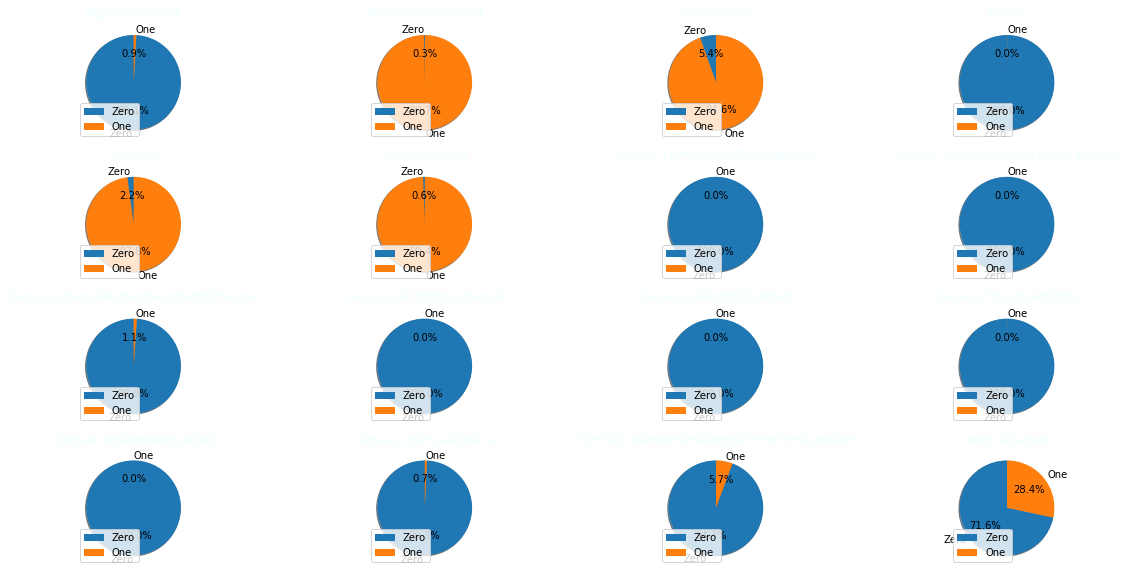

In [63]:
fig = plt.figure(figsize=(20,10))
for i, num in zip(BinaryColumns, range(1,20)):
    Zero = (train[i]==0).sum()
    One = (train[i]==1).sum()
    sizes = [Zero,One]
    labels = ['Zero','One']
    ax = fig.add_subplot(4,4,num) #fig1, ax1 = plt.subplots()
    plt.title(i, fontdict=None, loc='center', pad=None, color = "azure")
    ax.pie(sizes, labels = labels, autopct='%1.1f%%',shadow=True, startangle=90)
    ax.legend()

#ax.legend()
plt.show()


#### Counting the number of Null values in columns and calculating the Percentages

In [32]:
NoEmptyRows = []
percentages = []

for col in train:
    NoEmptyRows.append(train[col].isnull().sum())
    percentages.append((train[col].isnull().sum()/train.shape[0])*100)
    


In [33]:
MissingValueTable = pd.DataFrame ({'Column Name': train.columns,'Number of Empty Rows': NoEmptyRows,'Percentages':percentages})

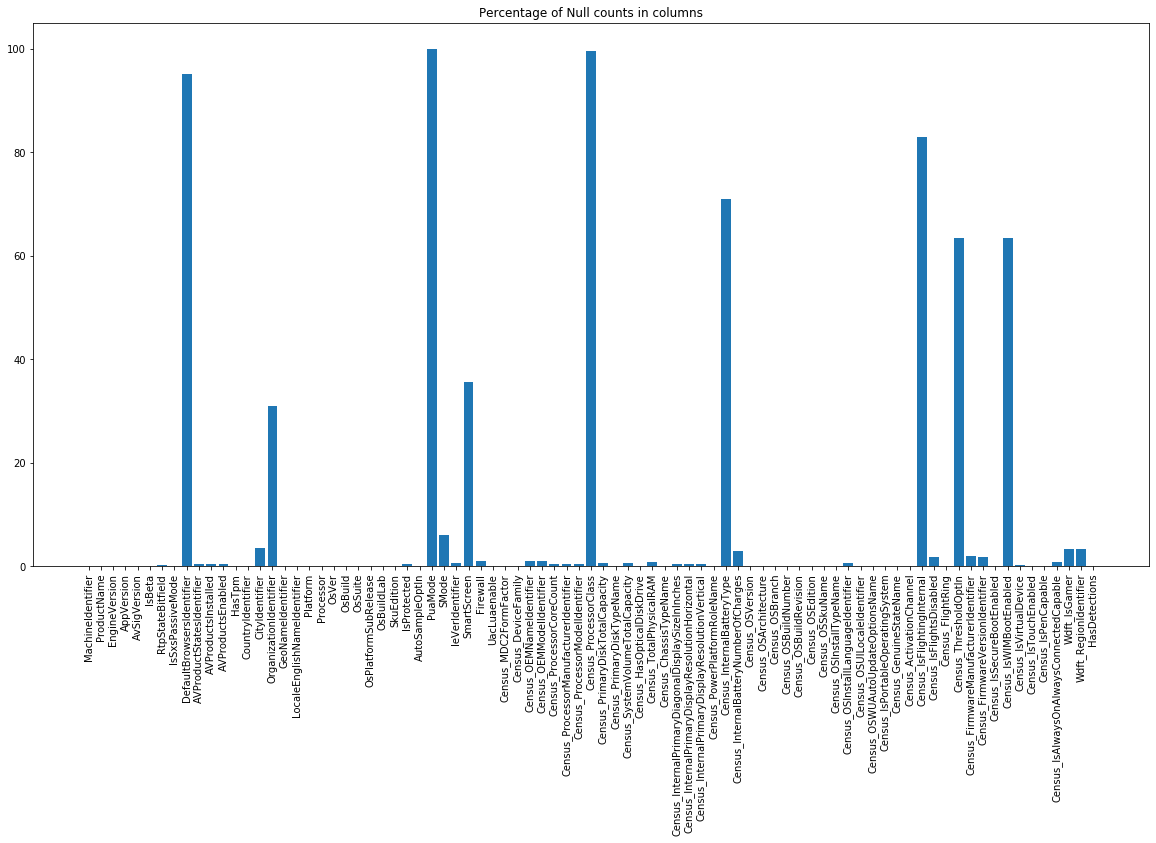

In [34]:
# Graph Missing Value Percentages
plt.figure(figsize=(20,10))
plt.title("Percentage of Null counts in columns", fontdict=None, loc='center', pad=None)
plt.xticks(rotation='vertical')
plt.bar(x = MissingValueTable['Column Name'], height = MissingValueTable['Percentages'])
plt.show()

### Let's look at distribution of the Devices where there is a Detection software is installed:

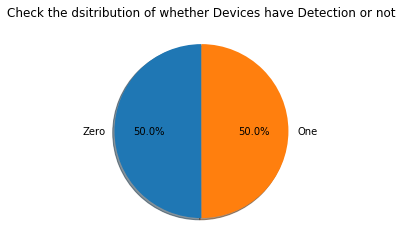

In [15]:
Zero = (train['HasDetections']==0).sum()
One  = (train['HasDetections']==1).sum()
sizes = [Zero,One]
labels = ['Zero','One']
fig1, ax1 = plt.subplots()
plt.title("Check the dsitribution of whether Devices have Detection or not", fontdict=None, loc='center', pad=None)
ax1.pie(sizes, labels = labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()

### Let's group infected machines by the "platform".
Windows 10 is the major infected platform.

In [16]:
group = ['Platform', 'HasDetections']
test = train.groupby(group).size().sort_index()

In [17]:
Test = pd.DataFrame (test)

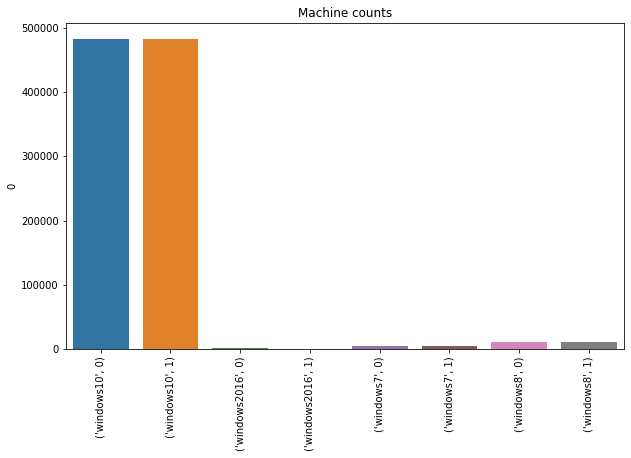

In [18]:
# Graph Missing Value Percentages
plt.figure(figsize=(10,6))
plt.title("Machine counts", fontdict=None, loc='center', pad=None)
plt.xticks(rotation='vertical')
plt.ylabel("Number of machines") #ax.set_ylabel('Probability density')
sns.barplot(x = test.index, y = Test[0])
plt.show()

### Let's group infected machines by Form Factor.

It is clear that Notebook are majorly hit and then desktops.

In [19]:
group = ['Census_MDC2FormFactor', 'HasDetections']
test = train.groupby(group).size().sort_index()

In [20]:
Test = pd.DataFrame (test)

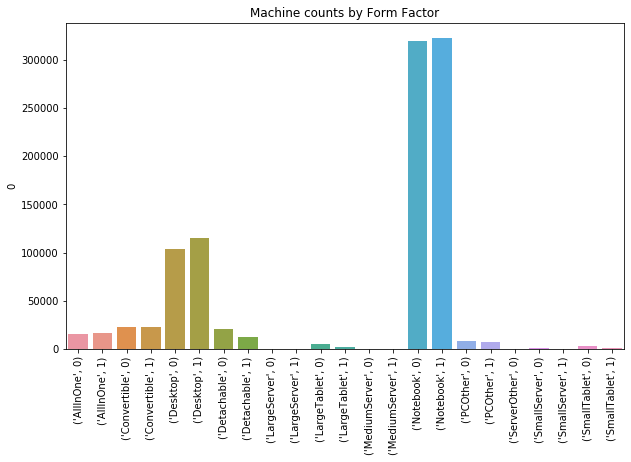

In [21]:
# Graph Missing Value Percentages
plt.figure(figsize=(10,6))
plt.title("Machine counts by Form Factor", fontdict=None, loc='center', pad=None)
plt.xticks(rotation='vertical')
plt.ylabel("Number of machines") 
sns.barplot(x = test.index, y = Test[0])
plt.show()

#### We should take a look to see if the columns are correlated.

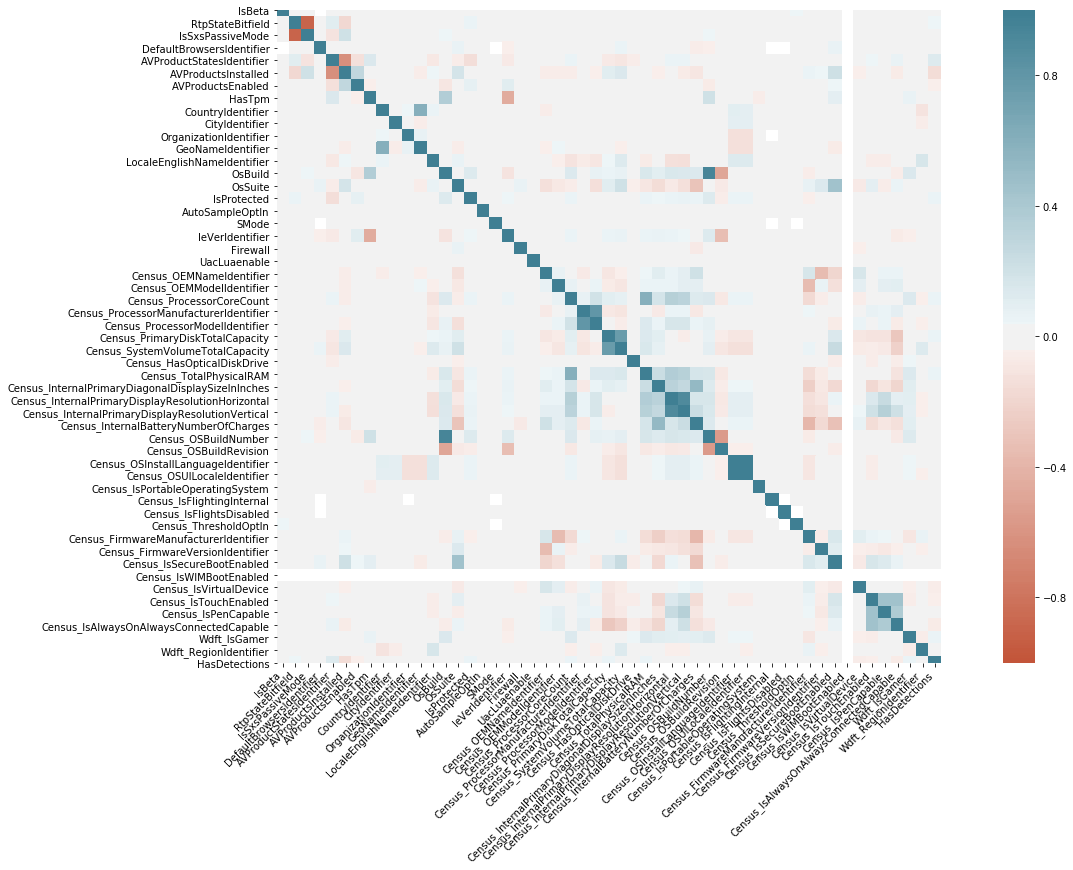

In [27]:
# Reference: https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec
corr = train.corr()
plt.figure(figsize=(22,12))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()